In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv(r"C:\Users\Ahsan\Downloads\loan_data_with_missing_values.csv")
print(dataset.head(3))


  Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001    Male     Yes          0      Graduate            No   
1   LP002  Female      No          1  Not Graduate           NaN   
2   LP003     NaN     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0         NaN             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0               NaN   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             0.0         Rural           N  
2             1.0     Semiurban           Y  


In [3]:
dataset.isnull().sum()

Loan_ID              0
Gender               1
Married              1
Dependents           1
Education            0
Self_Employed        1
ApplicantIncome      1
CoapplicantIncome    1
LoanAmount           1
Loan_Amount_Term     1
Credit_History       1
Property_Area        1
Loan_Status          0
dtype: int64

In [13]:
dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].mean(), inplace=True)

C:\Users\Ahsan\AppData\Local\Temp\ipykernel_13836\2571885999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].mean(), inplace=True)


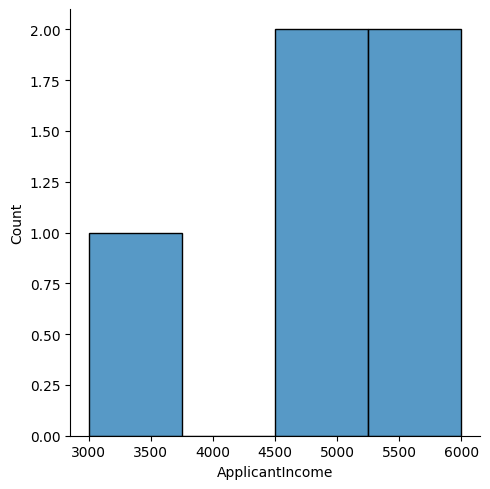

In [18]:
sns.displot(dataset["ApplicantIncome"])
plt.show()

In [22]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_scaled
count,5.000000,4.000000,4.000000,4.0,4.00,5.000000e+00
mean,4858.000000,877.000000,113.750000,315.0,0.75,4.440892e-17
std,1205.615403,1032.399793,32.988634,90.0,0.50,1.118034e+00
min,3000.000000,0.000000,66.000000,180.0,0.00,-1.723026e+00
25%,4583.000000,0.000000,106.500000,315.0,0.75,-2.550227e-01
50%,4858.000000,754.000000,124.000000,360.0,1.00,0.000000e+00
75%,5849.000000,1631.000000,131.250000,360.0,1.00,9.190092e-01
max,6000.000000,2000.000000,141.000000,360.0,1.00,1.059040e+00


In [25]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
dataset['ApplicantIncome_scaled'] = ss.fit_transform(dataset[['ApplicantIncome']])
print(dataset[['ApplicantIncome', 'ApplicantIncome_scaled']].head())




   ApplicantIncome  ApplicantIncome_scaled
0           5849.0                0.919009
1           4583.0               -0.255023
2           3000.0               -1.723026
3           4858.0                0.000000
4           6000.0                1.059040


In [39]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have already defined 'ss' and the dataset
ss = StandardScaler()

# Transform the data
transformed_data = ss.fit_transform(dataset[['ApplicantIncome']])

# Create a new DataFrame with transformed data and store it in the 'ApplicantIncome.ss' column
dataset['ApplicantIncome.ss'] = pd.DataFrame(transformed_data)

# Display the first 3 rows
print(dataset.head(3))



  Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001    Male     Yes          0      Graduate            No   
1   LP002  Female      No          1  Not Graduate           NaN   
2   LP003     NaN     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0         NaN             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0               NaN   

   Credit_History Property_Area Loan_Status  ApplicantIncome_scaled  \
0             1.0         Urban           Y                0.919009   
1             0.0         Rural           N               -0.255023   
2             1.0     Semiurban           Y               -1.723026   

   ApplicantIncome_X  ApplicantIncome.ss  
0           0.919009            0.919009  
1          -0.255023           -0.255023  
2          -1.723026        

In [40]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_scaled,ApplicantIncome_X,ApplicantIncome.ss
count,5.000000,4.000000,4.000000,4.0,4.00,5.000000e+00,5.000000e+00,5.000000e+00
mean,4858.000000,877.000000,113.750000,315.0,0.75,4.440892e-17,4.440892e-17,4.440892e-17
std,1205.615403,1032.399793,32.988634,90.0,0.50,1.118034e+00,1.118034e+00,1.118034e+00
min,3000.000000,0.000000,66.000000,180.0,0.00,-1.723026e+00,-1.723026e+00,-1.723026e+00
25%,4583.000000,0.000000,106.500000,315.0,0.75,-2.550227e-01,-2.550227e-01,-2.550227e-01
50%,4858.000000,754.000000,124.000000,360.0,1.00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5849.000000,1631.000000,131.250000,360.0,1.00,9.190092e-01,9.190092e-01,9.190092e-01
max,6000.000000,2000.000000,141.000000,360.0,1.00,1.059040e+00,1.059040e+00,1.059040e+00
